# NNIA Assignment 6

#### <font color="green">Happy</font> <font color="green">Holidays</font> 🎁🎄

**DEADLINE: 5.1.2022 08:00 CET**   
(Note: this is after the holidays and we don't include the time for the holidays as part of the assignment 1-week time requirement!)

- Trevor Atkins & trat00001@uni-saarland.de 
- Tsimafei Pakapenka & tspr00001@uni-saarland.de
- Hours of work per person: Prakapenka ~ 6h  Atkins ~4.5h

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any **data or cache files** (e.g. `__pycache__`, the dataset PyTorch downloads, etc.). 
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`.

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Regularization in Deep Learning

We will take a little break from the CIFAR10 Dataset and the model we have been working on for the time being. We will pick up on that in the next assignment after the holidays.

This assignment is aimed to give you some hands-on practice with regularization, which you have just covered in the lecture this week.

## 1 Theory Review (1.5 points)

You have implemented the regularization term in the previous assignment. Recall that the loss function is defined by:


\begin{align}
\tag{13}
\tilde{J}(\theta) &= \frac{1}{N} \sum^N_{i = 1} −\log \bigg[ \frac{\exp^{z^{(3)}_{y_{i}}}}{\sum^{K}_{j}\exp^{z^{(3)}_{j}}} \bigg]
+ \lambda \big( \Vert W^{(1)}\Vert^{2}_{2} + \Vert W^{(2)} \Vert^{2}_{2} \big)
\end{align}


where $\Vert \cdot \Vert^{2}_{2}$ is the squared $L_{2}$ norm. For example,


\begin{align}
\tag{14}
\Vert W^{(1)} \Vert^{2}_{2} &= \sum^{R}_{p=1}\sum^{S}_{q=1}{W^{(1)}_{pq}}^{2}, \text{where }R = \text{hidden size},S = \text{input size}
\end{align}

Review [Chapter 7: Regularization for Deep Learning](https://www.deeplearningbook.org/contents/regularization.html) in [Goodfellow et al. (2016)](https://www.deeplearningbook.org/) and answer the following questions:


1. Why do we penalize only weights, but not biases? Explain in your own words.
2. How does L2 norm affect weights? What feature characteristics are penalized more?
3. How does L1 norm treat weights differently than L2 norm? Why can L1 be used as a feature selection mechanism?


### 1.1 <font color="green">Done</font> 

1. Only the weights are penalized because weights identify relationships between variables in numerous states whereas biases control only one variable. Hence, we are not assuming that unregulated biases will lead to overfitting, but penalized biases could definitely result in underfitting.

2. L2 norm drives weights closer to the origin by adding squared sum of weights multiplied by $\alpha$ hyperparameter to the loss function. The feature charactersitics that are penalized more are covariances with the output target that is low compared to the added variance.

3.  L1 norm treats weights differently than L2 norm by the regularization contribution to the gradient being a constant factor with a sign equal to sign($w_{i}$) rather than scaling linearly with each $w_{i}$. It also results in a solution that is more sparse. L1 can be used as a feature selection mechanism because the sparsity property of L1 penalty with a linear model and a least squares cost function can provide a subset of the weights that become zero, indicating corresponding features may  be discarded.


## 2 Breast Cancer Detection (4 points)

We will be working with the [breast cancer detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer). For more details regarding the dataset description and the features, you can read more about it at the [Wisconcin Breast Cancer Diagnostic Dataset Repo](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

### 2.1 Data Preparation (1 point)
- Split the data [randomly](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and use 90% for training and 10% for your validation set.
- Look at the target distribution.
  - Is it balanced?
  - What evaluation metric would you use? Justify your answer.
  - By guessing randomly, what would be your accuracy? 


## <font color="green">Done</font> 

## 2.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Union, Tuple, Dict


import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

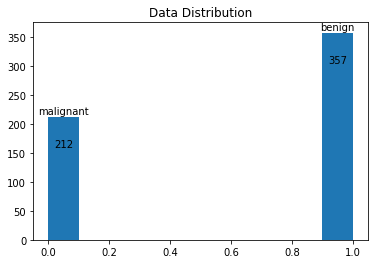

In [ ]:
def plot_distribution_hist(target_labels: List[int], target_names: List[str]):
    # Creating histogram
    fig, ax = plt.subplots(1, 1)
    ax.hist(target_labels)
      
    # Set title
    ax.set_title("Data Distribution")
      
    # Choose leftmost and rightmost rectangles for binary labels
    rects = [ax.patches[0], ax.patches[-1]]
    
    # assign labels to hist columns
    for rect, label in zip(rects, target_names):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.5, label, ha='center', va='bottom')
        ax.text(rect.get_x() + rect.get_width() / 2, height-55.5, int(height), ha='center', va='bottom')
      
    # Show plot
    plt.show()

plot_distribution_hist(data.target, data.target_names)

1. The target distribution is not balanced, there are more distributed for the 'benign' class than the 'malignant' class. 

2. There are some articles ([article1](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba), [article2](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)) about imbalanced datasets and metrics choice. Based on this, I plan to switch labels and use precision and recall both (f-score), because we want to focus on detection of malignant cases to avoid patient misclassied as benign while they are actually in serious danger. Second article states that for tasks where False Negatives are more important (miss cancer diagnosis) we should use f2-score.
Additionally, I think that accuracy is worth reporting too.

3. By guessing randomly, the accuracy may be high, possibly approximately 90%. However, other evaluation metrics will likely yield lower results. 

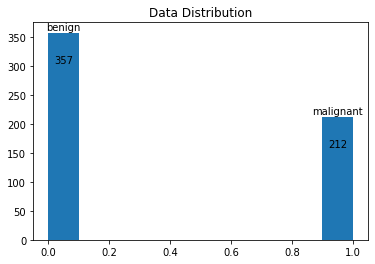

In [ ]:
# we switch labels to use precision and recall
switched_labels = [1 - label for label in data.target]
X_train, X_test, y_train, y_test = train_test_split(data.data, switched_labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

plot_distribution_hist(switched_labels, data.target_names[::-1])

## 2.2 & 2.3

Import your implementation in `solution.py` in the code cell below.

### 2.2 A Simple Neural Network (2 points)
- In PyTorch define a simple neural network based on the following scheme: $L_{30\rightarrow 20} \circ \text{ReLU} \circ L_{20\rightarrow 20} \circ \text{ReLU} \circ L_{20\rightarrow 10} \odot \sigma$
- Optimize it using the [Adam optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) with learning rate of $10^{-5}$ and run it for 500 epochs. **Report (i.e. print) train & test metrics before and after this optimization.** 
  - Due to the random nature of optimization, feel free to run the network several times until you get reasonable results.
- Your network produces a probability of the finding being benign. You have to choose a threshold by which to binarize the output into `0` and `1` so that you can use [BinaryCrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html). 

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.ReLU(),
            nn.Linear(10,1),
            nn.Sigmoid(),
        )

    def forward(self, x: Union[torch.Tensor, np.ndarray]):
        if isinstance(x, np.ndarray):
            x = torch.Tensor(x)

        logits = self.linear_relu_stack(x)
        return logits

    def l1_loss(self, x):
      return torch.abs(x).sum()

    def l2_loss(self, x):
      return torch.square(x).sum()

In [ ]:
def train_loop(x_data: np.ndarray,
               y_data: np.ndarray,
               model: SimpleNN,
               loss_fn,
               optimizer: torch.optim.Optimizer,
               l1_lambda: float = 0,
               l2_lambda: float = 0) -> Dict[str, float]:
    """Train loop function."""
    assert len(x_data) == len(y_data)
    dataset_size = len(y_data)

    accuracy = correct_true = target_true = predicted_true = avg_loss = 0
    for i, (x_item, gold_label) in enumerate(zip(x_data, y_data)):
        # Compute prediction and loss
        pred_output = model(x_item)
        loss = loss_fn(pred_output, torch.Tensor([gold_label]))
        
        l1_norm = l2_norm = 0

        if l1_lambda:
            l1_norm = sum(p.abs().sum() for p in model.parameters())
            l1_norm *= l1_lambda

        if l2_lambda:
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            l2_norm *= l2_lambda

        loss = loss + l1_norm + l2_norm

        pred_label = 1 if pred_output >= 0.5 else 0

        target_true += (gold_label == 1)
        predicted_true += (pred_label == 1)
        correct_true += (gold_label == 1 & pred_label == 1)
        accuracy += (gold_label == pred_label)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss += loss.item()

    recall = correct_true / target_true
    precision = correct_true / predicted_true
    beta = 2
    f_score = ((1 + beta**2) * precision * recall) / ((beta**2)*precision + recall)

    avg_loss /= dataset_size
    accuracy /= dataset_size

    result_metrics = {
        'loss': avg_loss,
        'accuracy': accuracy,
        'f2_score': f_score,
    }

    return result_metrics


def validation_loop(x_val: np.ndarray,
                    y_val: np.ndarray,
                    model: SimpleNN,
                    loss_fn) -> Dict[str, float]:
    """Validation loop function."""
    assert len(x_val) == len(y_val)

    accuracy = correct_true = target_true = predicted_true = avg_loss = 0
    dataset_size = len(x_val)

    with torch.no_grad():
      for x_item, gold_label in zip(x_val, y_val):
        pred_output = model(x_item)
        avg_loss += loss_fn(pred_output, torch.Tensor([gold_label])).item()

        pred_label = 1 if pred_output >= 0.5 else 0

        target_true += (gold_label == 1)
        predicted_true += (pred_label == 1)
        correct_true += (gold_label == 1 & pred_label == 1)
        accuracy += (gold_label == pred_label)

    # to avoid division by zero
    eps = 1e-10
    recall = correct_true / target_true
    if recall < eps:
        recall += eps
    precision = correct_true / predicted_true
    if precision < eps:
        precision += eps
    beta = 2
    f_score = ((1 + beta**2) * precision * recall) / ((beta**2)*precision + recall)


    avg_loss /= dataset_size
    accuracy /= dataset_size

    result_metrics = {
        'loss': avg_loss,
        'accuracy': accuracy,
        'f2_score': f_score,
    }

    return result_metrics

In [ ]:
def get_model_and_optimizer(learning_rate: float = 1e-5):
    """Defines model from scratch and optimizer based on it."""
    model = SimpleNN()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    return model, optimizer

In [ ]:
model, optimizer = get_model_and_optimizer()

loss_fn = nn.BCELoss()
test_metrics = validation_loop(X_test, y_test, model, loss_fn)

print('TEST BEFORE TRAIN: ', test_metrics)

TEST BEFORE TRAIN:  {'loss': 2.074653868602789, 'accuracy': 0.2982456140350877, 'f2_score': 0.6799999999999999}


In [ ]:
# You code should show before and after metrics and loss for the simple network (2.2)
EPOCHS = 500
best_epoch = best_val_loss = float('inf')
best_metrics = dict()

for cur_epoch in range(EPOCHS):
    print(cur_epoch, end=" ")
    train_metrics = train_loop(X_train, y_train, model, loss_fn, optimizer)
    val_metrics = validation_loop(X_val, y_val, model, loss_fn)

    # saving best checkpoint
    if val_metrics['loss'] < best_val_loss:
        best_val_loss = val_metrics['loss']
        best_epoch = cur_epoch
        best_metrics = val_metrics
        #print(f'SAVING BEST MODEL WITH VAL_LOSS={best_val_loss}.')
        torch.save(model.state_dict(), 'best-model.pt')

    if (cur_epoch+1) % 50 == 0:
        print()
        print(f"Epoch {cur_epoch + 1}\n-------------------------------")
        print('Train metrics: ', train_metrics)
        print('Validation metrics: ', val_metrics)
        print("\n-------------------------------")

print("Done!")

# Your code should show before and after metrics and loss and the epoch your model topped (2.3)

0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in long_scalars


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
Epoch 50
-------------------------------
Train metrics:  {'loss': 0.33559214046062713, 'accuracy': 0.9021739130434783, 'f2_score': 0.8166862514688603}
Validation metrics:  {'loss': 0.3228737347990318, 'accuracy': 0.9038461538461539, 'f2_score': 0.8152173913043478}

-------------------------------
50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
Epoch 100
-------------------------------
Train metrics:  {'loss': 0.2623591998285749, 'accuracy': 0.9108695652173913, 'f2_score': 0.8401400233372229}
Validation metrics:  {'loss': 0.2662195212905527, 'accuracy': 0.9038461538461539, 'f2_score': 0.8152173913043478}

-------------------------------
100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 12

Interesting point here that val_loss decreases for long time, but accuracy and f2_scores remain the same.

In [ ]:
model.load_state_dict(torch.load('best-model.pt'))

test_metrics = validation_loop(X_test, y_test, model, loss_fn)

print('TEST AFTER TRAIN: ', test_metrics)

TEST AFTER TRAIN:  {'loss': 0.09234404745196718, 'accuracy': 0.9649122807017544, 'f2_score': 0.9770114942528735}


### 2.3 Early Stopping & Patience (1 point)
- A very common strategy is to use early stoping. But how do we know when to stop? There are several ways which lead to different conditions, most common ones being the combination of (1) patience and (2) minimum improvement in validation. Incorporate these conditions: (1) patience with the constants $5$ and (2) minimum improvement in validation of $10^{-4}$ in your early stopping implementation. That means that you stop training when the validation loss does not decrease for more than $5$ epochs by at least $10^{-4}$ than the previous minimum.
- Run your model indefinitely until your model stops. **Print at which epoch your model stopped.**
- Importantly, at the end **report (i.e. print) the metrics** (your loss criterion and evaluation metric) on the best model (that is not the last one!)

In [ ]:
model, optimizer = get_model_and_optimizer()

loss_fn = nn.BCELoss()
test_metrics = validation_loop(X_test, y_test, model, loss_fn)

print('TEST BEFORE TRAIN: ', test_metrics)

TEST BEFORE TRAIN:  {'loss': 1.9765159517165445, 'accuracy': 0.2982456140350877, 'f2_score': 0.6799999999999999}


In [ ]:
best_epoch = best_val_loss = float('inf')
best_metrics = dict()

VAL_MIN_IMPROVEMENT = 0.0001
PATIENCE_STEPS_LIMIT = 5

patient_steps = 0

cur_epoch = 0
while True:
    cur_epoch += 1

    print(cur_epoch, end=" ")
    train_metrics = train_loop(X_train, y_train, model, loss_fn, optimizer)
    val_metrics = validation_loop(X_val, y_val, model, loss_fn)

    # saving best checkpoint
    if abs(val_metrics['loss'] - best_val_loss) > VAL_MIN_IMPROVEMENT:
        #print(f'SAVING BEST MODEL WITH VAL_LOSS={val_loss}.')
        best_val_loss = val_metrics['loss']
        best_epoch = cur_epoch
        best_metrics = val_metrics
        torch.save(model.state_dict(), 'second-best-model.pt')

        patient_steps = 0
    else:
        patient_steps += 1
    
    if patient_steps == PATIENCE_STEPS_LIMIT:
        break

    if (cur_epoch) % 50 == 0:
        print()
        print(f"Epoch {cur_epoch}\n-------------------------------")
        print('Train metrics: ', train_metrics)
        print('Validation metrics: ', val_metrics)
        print('Best metrics: ', best_metrics)
        print("\n-------------------------------")

1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in long_scalars


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
Epoch 50
-------------------------------
Train metrics:  {'loss': 0.4268502451198248, 'accuracy': 0.8826086956521739, 'f2_score': 0.7922535211267605}
Validation metrics:  {'loss': 0.4059588719087165, 'accuracy': 0.9230769230769231, 'f2_score': 0.8602150537634409}
Best metrics:  {'loss': 0.4059588719087165, 'accuracy': 0.9230769230769231, 'f2_score': 0.8602150537634409}

-------------------------------
51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
Epoch 100
-------------------------------
Train metrics:  {'loss': 0.26550896741967017, 'accuracy': 0.9152173913043479, 'f2_score': 0.8459743290548425}
Validation metrics:  {'loss': 0.25712697129823153, 'accuracy': 0.9038461538461539, 'f2_score': 0.8152173913043478}
Best metrics:  {'loss': 0.2571269712

In [ ]:
print('Stopped on epoch ', best_epoch)
print('Best metrics: ', best_metrics)

Stopped on epoch  250
Best metrics:  {'loss': 0.23024734083320852, 'accuracy': 0.9230769230769231, 'f2_score': 0.8602150537634409}


In [ ]:
model.load_state_dict(torch.load('second-best-model.pt'))

test_metrics = validation_loop(X_test, y_test, model, loss_fn)

print('TEST AFTER TRAIN: ', test_metrics)

TEST AFTER TRAIN:  {'loss': 0.11112330321877875, 'accuracy': 0.9649122807017544, 'f2_score': 0.9770114942528735}


Previous run stopped on 548 epoch with resulting validation and test accuracy ~ 0.94. Hence, for such a small task initial parameters initialization is important. Also, test and validation sets are small, so metrics are not very robust.

## 3 Weight Regularization & Visualization (3.5 points)

- Compute exactly how many trainable parameters the defined network has.
- Define a method for visualizing weights. It should look similar to the provided image (3 main images on a unified scale).
- Run your model for 1000 epochs:
  - Without any regularization
  - With $\lambda_1 = 0.1$ (coefficient for $L_1$ regularization)
  - With $\lambda_2 = 0.1$ (coefficient for $L_2$ regularization)
- Visualize the final weights of the three models and also report the average $L_1$ and $L_2$ norms.
  - For each model visualize the parameters as 3 matricies (with colored cells), one for each layer. Use the same color scale for all models to make them visuall comparable.
  - For an example of plotting *random* data see the following cell with the function `visualize_mock`.

## 3 <font color="green">Answer</font> 

Below is a mock of what we mean by the visualization of the weights. 

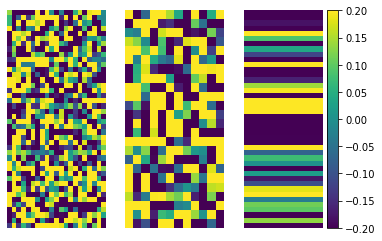

In [ ]:
# import solution

# solution.visualize_mock()

import matplotlib.pyplot as plt
import numpy as np

def visualize_mock():
    # create random data of random dimensions
    flat_layer_0 = np.random.rand(42, 21)-0.5
    flat_layer_1 = np.random.rand(24, 12)-0.5
    flat_layer_2 = np.random.rand(42).reshape(-1, 1)-0.5

    for i, im_data in enumerate([flat_layer_0, flat_layer_1, flat_layer_2]):
        plt.subplot(131 + i)
        plt.imshow(im_data, aspect='auto', vmin=-0.2, vmax=0.2)
        plt.axis('off')

    plt.colorbar()
    plt.show()
  
visualize_mock()

In [ ]:
# Your code should display the weights in a similar format to the mock one above for the following:
def visualize_weights(model):
    
    flat_layer_0 = model.linear_relu_stack[2].weight.detach().numpy()
    flat_layer_1 = model.linear_relu_stack[4].weight.detach().numpy()
    flat_layer_2 = model.linear_relu_stack[6].weight.detach().numpy()

    for i, im_data in enumerate([flat_layer_0, flat_layer_1, flat_layer_2]):
        plt.subplot(131 + i)
        plt.imshow(im_data, aspect='auto', vmin=-0.2, vmax=0.2)
        plt.axis('off')

    plt.colorbar()
    plt.show()

In [ ]:
def count_parameters(model):
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f'The model has {num_params:,} trainable parameters')
    return num_params

EPOCHS = 1000
modelNoReg, optimizer = get_model_and_optimizer()
count_parameters(modelNoReg)

The model has 1,261 trainable parameters


1261

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
Epoch 50
-------------------------------
Train metrics:  {'loss': 0.3636079815377551, 'accuracy': 0.9021739130434783, 'f2_score': 0.8284714119019837}
Validation metrics:  {'loss': 0.33735112718267585, 'accuracy': 0.9230769230769231, 'f2_score': 0.8602150537634409}
51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
Epoch 100
-------------------------------
Train metrics:  {'loss': 0.27759208079921627, 'accuracy': 0.9130434782608695, 'f2_score': 0.8488372093023258}
Validation metrics:  {'loss': 0.2665282699344293, 'accuracy': 0.9038461538461539, 'f2_score': 0.8152173913043478}
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144

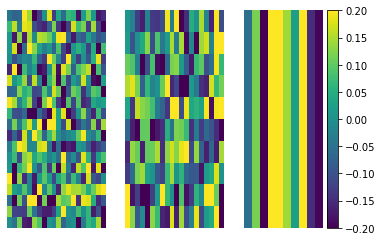

In [ ]:
for t in range(1, EPOCHS+1):
    print(t, end=" ")
    train_metrics = train_loop(X_train, y_train, modelNoReg, loss_fn, optimizer)
    val_metrics = validation_loop(X_val, y_val, modelNoReg, loss_fn)
    if t % 50 == 0:
      print()
      print(f"Epoch {t}\n-------------------------------")
      print('Train metrics: ', train_metrics)
      print('Validation metrics: ', val_metrics)

# no regularization
visualize_weights(modelNoReg)

In [ ]:
modelL1, optimizer = get_model_and_optimizer()

for t in range(1, EPOCHS+1):
    print(t, end=" ")
    train_metrics = train_loop(X_train, y_train, modelL1, loss_fn, optimizer, l1_lambda=0.1)
    val_metrics = validation_loop(X_val, y_val, modelL1, loss_fn)
    if t % 50 == 0:
      print()
      print(f"Epoch {t}\n-------------------------------")
      print('Train metrics: ', train_metrics)
      print('Validation metrics: ', val_metrics)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
Epoch 50
-------------------------------
Train metrics:  {'loss': 1.7290399375169174, 'accuracy': 0.9021739130434783, 'f2_score': 0.8245614035087718}
Validation metrics:  {'loss': 0.5161709450185299, 'accuracy': 0.9038461538461539, 'f2_score': 0.8152173913043478}
51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
Epoch 100
-------------------------------
Train metrics:  {'loss': 1.3951127389202946, 'accuracy': 0.9, 'f2_score': 0.7997630331753555}
Validation metrics:  {'loss': 0.44808623015594023, 'accuracy': 0.9230769230769231, 'f2_score': 0.8241758241758242}
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148

NameError: ignored

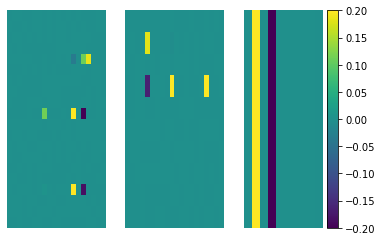

In [ ]:
# L1 regularization
visualize_weights(modelL1)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
Epoch 50
-------------------------------
Train metrics:  {'loss': 0.3790884642821291, 'accuracy': 0.9152173913043479, 'f2_score': 0.8459743290548425}
Validation metrics:  {'loss': 0.2580103383650287, 'accuracy': 0.9038461538461539, 'f2_score': 0.8152173913043478}
51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
Epoch 100
-------------------------------
Train metrics:  {'loss': 0.3790884642821291, 'accuracy': 0.9152173913043479, 'f2_score': 0.8459743290548425}
Validation metrics:  {'loss': 0.2580103383650287, 'accuracy': 0.9038461538461539, 'f2_score': 0.8152173913043478}
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 1

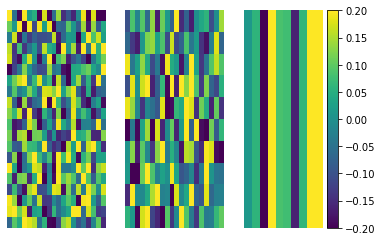

In [ ]:
modelL2, optimizer = get_model_and_optimizer()

for t in range(1, EPOCHS+1):
    print(t, end=" ")
    train_metrics = train_loop(X_train, y_train, modelL1, loss_fn, optimizer, l2_lambda=0.1)
    val_metrics = validation_loop(X_val, y_val, modelL1, loss_fn)
    if t % 50 == 0:
      print()
      print(f"Epoch {t}\n-------------------------------")
      print('Train metrics: ', train_metrics)
      print('Validation metrics: ', val_metrics)

# L2 regularization
visualize_weights(modelL2)

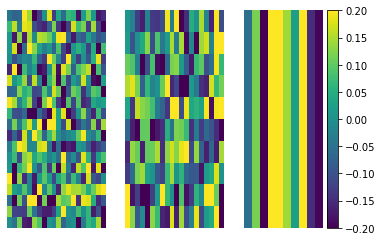

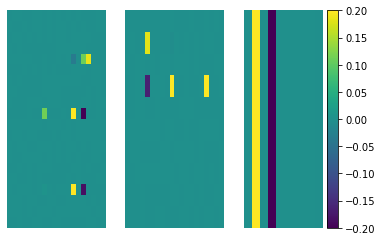

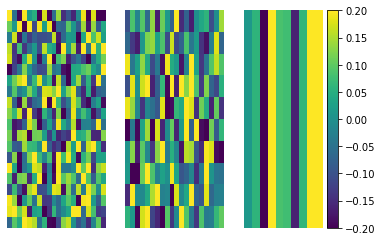

In [ ]:
# no regularization
visualize_weights(modelNoReg)

# L2 regularization
visualize_weights(modelL1)

# L2 regularization
visualize_weights(modelL2)

# 4 Dropout (1 points)

Read sections 1, 2 and 4 from [an introductory paper to dropout](https://dl.acm.org/doi/pdf/10.5555/2627435.2670313). Describe in detail what dropout is:
- What is the statistical rationale behind it, why we need it (0.25)
- How it is implemented (0.25)
- Importantly what do we have to take care of during inference? (0.5)

PS: Did you know that dropout is technically [patented by Google](https://patents.google.com/patent/US9406017B2/en)?

## 4 <font color="green">Answer</font> 

1. We need dropout, since it helps neural network to minimize overfitting during training process. Actually, we train a different combination of layers every time, therefore each neural unit does not overly rely on connections with exact neighbours.

2. It is implemented by sampling 0-1 weights from Bernoulli distribution for each neural unit. Bernoulli distribution is parametrized with pre-selected probability $p_{kill}$ (it is a hyperparameter).

3. As I understand, authors of the original paper are proposing not to apply dropout during test time, but multiply all weigths by $p_{keep} = 1-p_{kill}$. However, in actual implementations of [PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) and Tensorlow the neural network is not affected by dropout at all. Instead, there is a multiplication factor $\frac{1}{1-p_{kill}}$ for each weight during training. As explained in this [article](https://leimao.github.io/blog/Dropout-Explained) technically both approaches are equal.


# Bonus: Gradient Clipping in Pytorch (1 point)

- What issue does gradient clipping try to solve?
- Look at PyTorch's [implementation](https://pytorch.org/docs/stable/_modules/torch/nn/utils/clip_grad.html) of gradient clipping in the [source code on GitHub](https://github.com/pytorch/pytorch). Find out the formula they use and write it here in $\LaTeX$.
- Generate a random (imaginary) gradient and:
  - Apply PyTorch's gradient clipping function
  - Implement your own gradient clipping function and verify that the results are the same


Gradient clipping is trying to solve a problem of exploding and vanishing gradients by scaling all values to the pre-selected range.